<a href="https://colab.research.google.com/github/vaishnavipatil29/LetsUpgrade-AI-ML-/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!cd /content/gdrive/MyDrive/MS_CD_SW/PartB_Telugu/Train/Audio

In [3]:
import numpy as np
import soundfile as sf
import pickle
import cv2
import glob

In [6]:
import pickle
feat_file = open("/content/gdrive/MyDrive/MS_CD_SW/PartB_Telugu/Train/telugu_feat_1000.pkl", "rb")
tel_feat = pickle.load(feat_file)

In [9]:
import numpy as np

for i in range(0,len(tel_feat)):
  tel_feat[i] = np.stack( tel_feat[i], axis=0 )

sequence = np.array(tel_feat)

In [55]:
sequence.shape

(24678, 19, 39)

In [1]:
print("Hello")

Hello


In [7]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [10]:
n_in = 19

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,39)))
model.add(RepeatVector(n_in))

model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(39)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=10, verbose=1)

Epoch 1/10
772/772 [==============================] - 60s 37ms/step - loss: 131.6577
Epoch 2/10
772/772 [==============================] - 29s 38ms/step - loss: 59.9490
Epoch 3/10
772/772 [==============================] - 29s 37ms/step - loss: 51.1291
Epoch 4/10
772/772 [==============================] - 29s 38ms/step - loss: 45.4427
Epoch 5/10
772/772 [==============================] - 29s 37ms/step - loss: 41.2609
Epoch 6/10
772/772 [==============================] - 29s 37ms/step - loss: 37.1960
Epoch 7/10
772/772 [==============================] - 29s 37ms/step - loss: 37.2707
Epoch 8/10
772/772 [==============================] - 29s 37ms/step - loss: 34.0592
Epoch 9/10
772/772 [==============================] - 29s 37ms/step - loss: 31.1218
Epoch 10/10
772/772 [==============================] - 29s 37ms/step - loss: 29.3940


In [56]:
n_in = 19

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,39)))
model.add(RepeatVector(n_in))

model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(39)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=30, verbose=1)

Epoch 1/30
772/772 [==============================] - 33s 37ms/step - loss: 107.0365
Epoch 2/30
772/772 [==============================] - 28s 37ms/step - loss: 56.7558
Epoch 3/30
772/772 [==============================] - 28s 37ms/step - loss: 48.6983
Epoch 4/30
772/772 [==============================] - 29s 37ms/step - loss: 48.1162
Epoch 5/30
772/772 [==============================] - 28s 37ms/step - loss: 43.1438
Epoch 6/30
772/772 [==============================] - 29s 37ms/step - loss: 41.0527
Epoch 7/30
772/772 [==============================] - 28s 37ms/step - loss: 40.0138
Epoch 8/30
772/772 [==============================] - 28s 37ms/step - loss: 39.5217
Epoch 9/30
772/772 [==============================] - 29s 37ms/step - loss: 39.1328
Epoch 10/30
772/772 [==============================] - 28s 37ms/step - loss: 38.8753
Epoch 11/30
772/772 [==============================] - 28s 37ms/step - loss: 38.6556
Epoch 12/30
772/772 [==============================] - 28s 37ms/step - lo

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# load json and create model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [14]:
model = loaded_model

In [ ]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs

#get output of each layer
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
#test = np.random.random(input_shape)[np.newaxis,...]
test = sequence
layer_outs = [func([test]) for func in functors]
print (layer_outs)


In [32]:
print("No of Layers : ",len(layer_outs))
print(len(layer_outs[0]))
print(len(layer_outs[0][0]))
print(len(layer_outs[0][0][0]))
print(len(layer_outs[1][0][0]))
print(len(layer_outs[2][0][0]))
print(len(layer_outs[3][0][0]))

No of Layers :  4
1
24678
100
19
19
19


In [35]:
output = layer_outs[0][0]
print(len(output[0]))
print(len(output))

100
24678


In [44]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=1)
gmm.fit(output)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [41]:
# print the converged log-likelihood value
print(gmm.lower_bound_)
  
# print the number of iterations needed
# for the log-likelihood value to converge
#print(gmm.n_iter_)</div>
print(gmm.n_iter_)


137.23825486409353
2


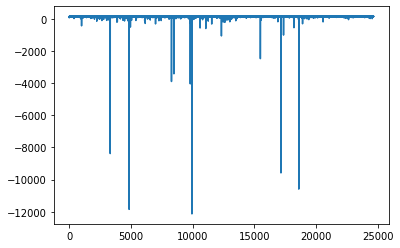

In [47]:
import matplotlib.pyplot as plt

score = gmm.score_samples(output)
plt.plot(score)

In [48]:
from keras.models import Model

out = model.layers[0].output
m = Model(inputs = model.input, outputs=out)
output = m.predict(sequence)

In [49]:
print(len(output[0]))
print(len(output))

100
24678


In [50]:
gmm = GaussianMixture(n_components=1)
gmm.fit(output)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [51]:
# print the converged log-likelihood value
print(gmm.lower_bound_)
  
# print the number of iterations needed
# for the log-likelihood value to converge
#print(gmm.n_iter_)</div>
print(gmm.n_iter_)

137.23825484734297
2


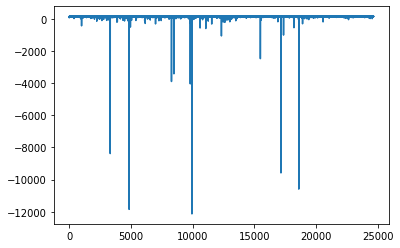

In [52]:
import matplotlib.pyplot as plt

score = gmm.score_samples(output)
plt.plot(score)

In [54]:
log_likelihood = gmm.score(output)
print(log_likelihood)

137.23825484734297
